In [16]:
#installing the required packages for google colab
!pip install https://github.com/nithinmurali/pygsheets/archive/master.zip
!apt-get -qq install -y graphviz && pip install -q pydot

    100% |████████████████████████████████| 112kB 2.7MB/s 
  Running setup.py bdist_wheel for pygsheets ... - \ done
  Stored in directory: /tmp/pip-ephem-wheel-cache-9ewebthw/wheels/d9/57/8e/549fffb1482b9d3ec4f60a378f4c32f3dbba74e4aad728dd27
Successfully built pygsheets


In [4]:
#authorize 1
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

gpg: keybox '/tmp/tmp1udpetvt/pubring.gpg' created
gpg: /tmp/tmp1udpetvt/trustdb.gpg: trustdb created
gpg: key AD5F235DF639B041: public key "Launchpad PPA for Alessandro Strada" imported
gpg: Total number processed: 1
gpg:               imported: 1
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
#authorize 
!pip install -U -q PyDrive ## you will have install for every colab session
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pygsheets

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model
from keras.initializers import *
from sklearn.preprocessing import *
from sklearn.metrics import *


Using TensorFlow backend.


In [0]:
#accessing the drive
!mkdir -p drive
!google-drive-ocamlfuse drive

In [9]:
#loading the google sheets
gc = pygsheets.authorize(outh_file='drive/Colab Notebooks/client_secret_430362481330-rp2r1tr6c5p8ef3q3ip4vfhtfabmqehf.apps.googleusercontent.com.json',outh_nonlocal=True)


Go to the following link in your browser:

    https://accounts.google.com/o/oauth2/auth?client_id=430362481330-rp2r1tr6c5p8ef3q3ip4vfhtfabmqehf.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fspreadsheets+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&access_type=offline&response_type=code

Enter verification code: 4/AAAPwaVKzvoOS8QgKsCZiXVovqXFJyB1zsx6NvKLHjUMVrC_kDHiAIc
Authentication successful.
Storing credentials to /content/sheets.googleapis.com-python.json


In [0]:
# Open spreadsheet and then workseet
sh = gc.open('optimizer analysis')
wks = sh.sheet1

In [0]:
#loading the dataset from drive to colab
imp = drive.CreateFile({'id':'1Wcf0XRJa1R02lvlUhJl7vcvSN9TVWYW0'})
imp.GetContentFile('pima-indians-diabetes.csv')

In [12]:
#colab to pandas
df= pd.read_csv("pima-indians-diabetes.csv")
df.columns = np.arange(9) #rename labels
df

,0,1,2,3,4,5,6,7,8
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
5,3,78,50,32,88,31.0,0.248,26,1
6,10,115,0,0,0,35.3,0.134,29,0
7,2,197,70,45,543,30.5,0.158,53,1
8,8,125,96,0,0,0.0,0.232,54,1
9,4,110,92,0,0,37.6,0.191,30,0


In [0]:
X = df.iloc[:,0:8] #independent variable
Y = df.iloc[:,8] #dependent variable

In [0]:
funct = []
funct.append('SGD')
funct.append('RMSprop')
funct.append('Adagrad')
funct.append('Adadelta')
funct.append('Adam')
funct.append('Adamax')
funct.append('Nadam')


In [15]:
analysisdf = pd.DataFrame(columns= ["optimizer",
                                    "accuracy"])
rownumber = 0
analysisdf  

,optimizer,accuracy


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 0s 600us/step - loss: 0.7014 - acc: 0.3524 - val_loss: 0.6940 - val_acc: 0.5325
Epoch 2/150
613/613 [==============================] - 0s 127us/step - loss: 0.6937 - acc: 0.5351 - val_loss: 0.6875 - val_acc: 0.6039
Epoch 3/150
613/613 [==============================] - 0s 114us/step - loss: 0.6865 - acc: 0.6395 - val_loss: 0.6817 - val_acc: 0.6494
Epoch 4/150
613/613 [==============================] - 0s 133us/step - loss: 0.6801 - acc: 0.6607 - val_loss: 0.6764 - val_acc: 0.6558
Epoch 5/150
613/613 [==============================] - 0s 121us/step - loss: 0.6741 - acc: 0.6607 - val_loss: 0.6711 - val_acc: 0.6429
Epoch 6/150
613/613 [==============================] - 0s 105us/step - loss: 0.6682 - acc: 0.6542 - val_loss: 0.6662 - val_acc: 0.6429
Epoch 7/150
613/613 [==============================] - 0s 115us/step - loss: 0.6627 - acc: 0.6542 - val_loss: 0.6615 - val_acc: 0.6429
Epoch 8/1

613/613 [==============================] - 0s 135us/step - loss: 0.5865 - acc: 0.6786 - val_loss: 0.5961 - val_acc: 0.6429
Epoch 25/150
613/613 [==============================] - 0s 148us/step - loss: 0.5826 - acc: 0.6770 - val_loss: 0.5924 - val_acc: 0.6494
Epoch 26/150
613/613 [==============================] - 0s 195us/step - loss: 0.5785 - acc: 0.6786 - val_loss: 0.5891 - val_acc: 0.6429
Epoch 27/150
613/613 [==============================] - 0s 160us/step - loss: 0.5748 - acc: 0.6819 - val_loss: 0.5857 - val_acc: 0.6494
Epoch 28/150
613/613 [==============================] - 0s 165us/step - loss: 0.5709 - acc: 0.6900 - val_loss: 0.5824 - val_acc: 0.6558
Epoch 29/150
613/613 [==============================] - 0s 188us/step - loss: 0.5672 - acc: 0.6949 - val_loss: 0.5791 - val_acc: 0.6688
Epoch 30/150
613/613 [==============================] - 0s 157us/step - loss: 0.5636 - acc: 0.7015 - val_loss: 0.5757 - val_acc: 0.6688
Epoch 31/150
613/613 [==============================] - 0s 16

613/613 [==============================] - 0s 161us/step - loss: 0.5151 - acc: 0.7520 - val_loss: 0.5316 - val_acc: 0.7468
Epoch 46/150
613/613 [==============================] - 0s 174us/step - loss: 0.5126 - acc: 0.7569 - val_loss: 0.5292 - val_acc: 0.7468
Epoch 47/150
613/613 [==============================] - 0s 159us/step - loss: 0.5099 - acc: 0.7586 - val_loss: 0.5269 - val_acc: 0.7468
Epoch 48/150
613/613 [==============================] - 0s 176us/step - loss: 0.5075 - acc: 0.7651 - val_loss: 0.5247 - val_acc: 0.7532
Epoch 49/150
613/613 [==============================] - 0s 164us/step - loss: 0.5051 - acc: 0.7667 - val_loss: 0.5222 - val_acc: 0.7597
Epoch 50/150
613/613 [==============================] - 0s 165us/step - loss: 0.5026 - acc: 0.7651 - val_loss: 0.5200 - val_acc: 0.7662
Epoch 51/150
613/613 [==============================] - 0s 179us/step - loss: 0.5004 - acc: 0.7684 - val_loss: 0.5180 - val_acc: 0.7662
Epoch 52/150
613/613 [==============================] - 0s 16

613/613 [==============================] - 0s 166us/step - loss: 0.4757 - acc: 0.7798 - val_loss: 0.4948 - val_acc: 0.7727
Epoch 66/150
613/613 [==============================] - 0s 176us/step - loss: 0.4744 - acc: 0.7798 - val_loss: 0.4936 - val_acc: 0.7662
Epoch 67/150
613/613 [==============================] - 0s 179us/step - loss: 0.4732 - acc: 0.7798 - val_loss: 0.4926 - val_acc: 0.7662
Epoch 68/150
613/613 [==============================] - 0s 171us/step - loss: 0.4719 - acc: 0.7814 - val_loss: 0.4914 - val_acc: 0.7597
Epoch 69/150
613/613 [==============================] - 0s 168us/step - loss: 0.4707 - acc: 0.7847 - val_loss: 0.4904 - val_acc: 0.7597
Epoch 70/150
613/613 [==============================] - 0s 177us/step - loss: 0.4695 - acc: 0.7830 - val_loss: 0.4896 - val_acc: 0.7662
Epoch 71/150
613/613 [==============================] - 0s 163us/step - loss: 0.4685 - acc: 0.7847 - val_loss: 0.4889 - val_acc: 0.7662
Epoch 72/150
613/613 [==============================] - 0s 17

Epoch 86/150
613/613 [==============================] - 0s 164us/step - loss: 0.4559 - acc: 0.7912 - val_loss: 0.4778 - val_acc: 0.7597
Epoch 87/150
613/613 [==============================] - 0s 170us/step - loss: 0.4553 - acc: 0.7896 - val_loss: 0.4771 - val_acc: 0.7597
Epoch 88/150
613/613 [==============================] - 0s 173us/step - loss: 0.4547 - acc: 0.7879 - val_loss: 0.4768 - val_acc: 0.7597
Epoch 89/150
613/613 [==============================] - 0s 173us/step - loss: 0.4541 - acc: 0.7912 - val_loss: 0.4761 - val_acc: 0.7597
Epoch 90/150
613/613 [==============================] - 0s 144us/step - loss: 0.4534 - acc: 0.7863 - val_loss: 0.4759 - val_acc: 0.7597
Epoch 91/150
613/613 [==============================] - 0s 171us/step - loss: 0.4529 - acc: 0.7896 - val_loss: 0.4752 - val_acc: 0.7597
Epoch 92/150
613/613 [==============================] - 0s 151us/step - loss: 0.4524 - acc: 0.7896 - val_loss: 0.4747 - val_acc: 0.7662
Epoch 93/150
613/613 [==========================

613/613 [==============================] - 0s 155us/step - loss: 0.4463 - acc: 0.7912 - val_loss: 0.4723 - val_acc: 0.7597
Epoch 107/150
613/613 [==============================] - 0s 162us/step - loss: 0.4460 - acc: 0.7928 - val_loss: 0.4723 - val_acc: 0.7597
Epoch 108/150
613/613 [==============================] - 0s 179us/step - loss: 0.4455 - acc: 0.7961 - val_loss: 0.4725 - val_acc: 0.7597
Epoch 109/150
613/613 [==============================] - 0s 164us/step - loss: 0.4452 - acc: 0.7977 - val_loss: 0.4720 - val_acc: 0.7597
Epoch 110/150
613/613 [==============================] - 0s 164us/step - loss: 0.4449 - acc: 0.7961 - val_loss: 0.4714 - val_acc: 0.7597
Epoch 111/150
613/613 [==============================] - 0s 181us/step - loss: 0.4445 - acc: 0.7945 - val_loss: 0.4712 - val_acc: 0.7597
Epoch 112/150
613/613 [==============================] - 0s 174us/step - loss: 0.4443 - acc: 0.7945 - val_loss: 0.4717 - val_acc: 0.7597
Epoch 113/150
613/613 [==============================] 

613/613 [==============================] - 0s 160us/step - loss: 0.4403 - acc: 0.7928 - val_loss: 0.4712 - val_acc: 0.7532
Epoch 127/150
613/613 [==============================] - 0s 172us/step - loss: 0.4400 - acc: 0.7928 - val_loss: 0.4717 - val_acc: 0.7532
Epoch 128/150
613/613 [==============================] - 0s 169us/step - loss: 0.4398 - acc: 0.7896 - val_loss: 0.4712 - val_acc: 0.7532
Epoch 129/150
613/613 [==============================] - 0s 160us/step - loss: 0.4395 - acc: 0.7928 - val_loss: 0.4715 - val_acc: 0.7532
Epoch 130/150
613/613 [==============================] - 0s 168us/step - loss: 0.4392 - acc: 0.7896 - val_loss: 0.4712 - val_acc: 0.7532
Epoch 131/150
613/613 [==============================] - 0s 170us/step - loss: 0.4389 - acc: 0.7912 - val_loss: 0.4711 - val_acc: 0.7532
Epoch 132/150
613/613 [==============================] - 0s 164us/step - loss: 0.4387 - acc: 0.7896 - val_loss: 0.4716 - val_acc: 0.7532
Epoch 133/150
613/613 [==============================] 

613/613 [==============================] - 0s 167us/step - loss: 0.4354 - acc: 0.7928 - val_loss: 0.4721 - val_acc: 0.7727
Epoch 147/150
613/613 [==============================] - 0s 169us/step - loss: 0.4352 - acc: 0.7928 - val_loss: 0.4715 - val_acc: 0.7662
Epoch 148/150
613/613 [==============================] - 0s 172us/step - loss: 0.4350 - acc: 0.7945 - val_loss: 0.4714 - val_acc: 0.7662
Epoch 149/150
613/613 [==============================] - 0s 151us/step - loss: 0.4347 - acc: 0.7928 - val_loss: 0.4717 - val_acc: 0.7662
Epoch 150/150
767/767 [==============================] - 0s 73us/step
Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 0s 568us/step - loss: 0.5539 - acc: 0.6754 - val_loss: 0.5256 - val_acc: 0.7468
Epoch 2/150
613/613 [==============================] - 0s 174us/step - loss: 0.4777 - acc: 0.7732 - val_loss: 0.4705 - val_acc: 0.7662
Epoch 3/150
613/613 [==============================] - 0s 201us/step - loss: 0.4

613/613 [==============================] - 0s 187us/step - loss: 0.4005 - acc: 0.7977 - val_loss: 0.5031 - val_acc: 0.7792
Epoch 17/150
613/613 [==============================] - 0s 178us/step - loss: 0.3895 - acc: 0.8238 - val_loss: 0.5022 - val_acc: 0.7922
Epoch 18/150
613/613 [==============================] - 0s 192us/step - loss: 0.3837 - acc: 0.8238 - val_loss: 0.4935 - val_acc: 0.7857
Epoch 19/150
613/613 [==============================] - 0s 171us/step - loss: 0.3829 - acc: 0.8271 - val_loss: 0.4858 - val_acc: 0.8117
Epoch 20/150
613/613 [==============================] - 0s 176us/step - loss: 0.3858 - acc: 0.8254 - val_loss: 0.4983 - val_acc: 0.8052
Epoch 21/150
613/613 [==============================] - 0s 207us/step - loss: 0.3782 - acc: 0.8173 - val_loss: 0.5182 - val_acc: 0.7987
Epoch 22/150
613/613 [==============================] - 0s 185us/step - loss: 0.3688 - acc: 0.8352 - val_loss: 0.5425 - val_acc: 0.7857
Epoch 23/150
613/613 [==============================] - 0s 18

613/613 [==============================] - 0s 189us/step - loss: 0.2930 - acc: 0.8679 - val_loss: 0.6556 - val_acc: 0.7922
Epoch 38/150
613/613 [==============================] - 0s 194us/step - loss: 0.3090 - acc: 0.8695 - val_loss: 0.6131 - val_acc: 0.7792
Epoch 39/150
613/613 [==============================] - 0s 178us/step - loss: 0.2805 - acc: 0.8728 - val_loss: 0.6977 - val_acc: 0.7857
Epoch 40/150
613/613 [==============================] - 0s 187us/step - loss: 0.2928 - acc: 0.8695 - val_loss: 0.6546 - val_acc: 0.7987
Epoch 41/150
613/613 [==============================] - 0s 206us/step - loss: 0.2897 - acc: 0.8679 - val_loss: 0.6703 - val_acc: 0.7857
Epoch 42/150
613/613 [==============================] - 0s 183us/step - loss: 0.2777 - acc: 0.8809 - val_loss: 0.7244 - val_acc: 0.7273
Epoch 43/150
613/613 [==============================] - 0s 186us/step - loss: 0.2831 - acc: 0.8793 - val_loss: 0.6392 - val_acc: 0.7857
Epoch 44/150
613/613 [==============================] - 0s 19

613/613 [==============================] - 0s 210us/step - loss: 0.2098 - acc: 0.9054 - val_loss: 0.8974 - val_acc: 0.7662
Epoch 59/150
613/613 [==============================] - 0s 181us/step - loss: 0.2026 - acc: 0.9201 - val_loss: 0.9266 - val_acc: 0.7792
Epoch 60/150
613/613 [==============================] - 0s 181us/step - loss: 0.1838 - acc: 0.9282 - val_loss: 1.0210 - val_acc: 0.7273
Epoch 61/150
613/613 [==============================] - 0s 196us/step - loss: 0.1798 - acc: 0.9266 - val_loss: 0.9981 - val_acc: 0.8052
Epoch 62/150
613/613 [==============================] - 0s 190us/step - loss: 0.2132 - acc: 0.8972 - val_loss: 1.0606 - val_acc: 0.7468
Epoch 63/150
613/613 [==============================] - 0s 199us/step - loss: 0.1847 - acc: 0.9250 - val_loss: 1.0213 - val_acc: 0.7273
Epoch 64/150
613/613 [==============================] - 0s 188us/step - loss: 0.2099 - acc: 0.9086 - val_loss: 1.0940 - val_acc: 0.7792
Epoch 65/150
613/613 [==============================] - 0s 20

613/613 [==============================] - 0s 189us/step - loss: 0.1208 - acc: 0.9543 - val_loss: 1.1743 - val_acc: 0.7727
Epoch 80/150
613/613 [==============================] - 0s 193us/step - loss: 0.1039 - acc: 0.9772 - val_loss: 1.3007 - val_acc: 0.7013
Epoch 81/150
613/613 [==============================] - 0s 191us/step - loss: 0.1284 - acc: 0.9527 - val_loss: 1.3246 - val_acc: 0.7532
Epoch 82/150
613/613 [==============================] - 0s 196us/step - loss: 0.1337 - acc: 0.9511 - val_loss: 1.4105 - val_acc: 0.7338
Epoch 83/150
613/613 [==============================] - 0s 199us/step - loss: 0.1361 - acc: 0.9592 - val_loss: 1.2525 - val_acc: 0.7922
Epoch 84/150
613/613 [==============================] - 0s 190us/step - loss: 0.1297 - acc: 0.9494 - val_loss: 1.3295 - val_acc: 0.7532
Epoch 85/150
613/613 [==============================] - 0s 192us/step - loss: 0.1119 - acc: 0.9592 - val_loss: 1.3387 - val_acc: 0.7792
Epoch 86/150
613/613 [==============================] - 0s 19

613/613 [==============================] - 0s 192us/step - loss: 0.0970 - acc: 0.9657 - val_loss: 1.5311 - val_acc: 0.7597
Epoch 101/150
613/613 [==============================] - 0s 188us/step - loss: 0.0509 - acc: 0.9886 - val_loss: 1.5944 - val_acc: 0.7662
Epoch 102/150
613/613 [==============================] - 0s 185us/step - loss: 0.1054 - acc: 0.9592 - val_loss: 1.4395 - val_acc: 0.7857
Epoch 103/150
613/613 [==============================] - 0s 179us/step - loss: 0.1434 - acc: 0.9543 - val_loss: 1.4663 - val_acc: 0.7338
Epoch 104/150
613/613 [==============================] - 0s 189us/step - loss: 0.0533 - acc: 0.9902 - val_loss: 1.5237 - val_acc: 0.7792
Epoch 105/150
613/613 [==============================] - 0s 185us/step - loss: 0.0497 - acc: 0.9853 - val_loss: 1.5484 - val_acc: 0.7857
Epoch 106/150
613/613 [==============================] - 0s 182us/step - loss: 0.0421 - acc: 0.9918 - val_loss: 1.6913 - val_acc: 0.7273
Epoch 107/150
613/613 [==============================] 

613/613 [==============================] - 0s 184us/step - loss: 0.0540 - acc: 0.9853 - val_loss: 1.7077 - val_acc: 0.7662
Epoch 122/150
613/613 [==============================] - 0s 192us/step - loss: 0.0207 - acc: 1.0000 - val_loss: 1.8452 - val_acc: 0.7468
Epoch 123/150
613/613 [==============================] - 0s 193us/step - loss: 0.0362 - acc: 0.9886 - val_loss: 1.9119 - val_acc: 0.7273
Epoch 124/150
613/613 [==============================] - 0s 181us/step - loss: 0.1333 - acc: 0.9592 - val_loss: 1.9041 - val_acc: 0.7532
Epoch 125/150
613/613 [==============================] - 0s 191us/step - loss: 0.0450 - acc: 0.9886 - val_loss: 1.7941 - val_acc: 0.7922
Epoch 126/150
613/613 [==============================] - 0s 174us/step - loss: 0.0315 - acc: 0.9935 - val_loss: 1.7261 - val_acc: 0.7727
Epoch 127/150
613/613 [==============================] - 0s 189us/step - loss: 0.0165 - acc: 0.9984 - val_loss: 1.7570 - val_acc: 0.7922
Epoch 128/150
613/613 [==============================] 

613/613 [==============================] - 0s 183us/step - loss: 0.0082 - acc: 1.0000 - val_loss: 1.9844 - val_acc: 0.7792
Epoch 143/150
613/613 [==============================] - 0s 184us/step - loss: 0.0247 - acc: 0.9902 - val_loss: 2.0865 - val_acc: 0.7468
Epoch 144/150
613/613 [==============================] - 0s 197us/step - loss: 0.0959 - acc: 0.9657 - val_loss: 2.0368 - val_acc: 0.7597
Epoch 145/150
613/613 [==============================] - 0s 187us/step - loss: 0.0485 - acc: 0.9902 - val_loss: 1.9632 - val_acc: 0.7662
Epoch 146/150
613/613 [==============================] - 0s 175us/step - loss: 0.0112 - acc: 0.9984 - val_loss: 2.0036 - val_acc: 0.7468
Epoch 147/150
613/613 [==============================] - 0s 194us/step - loss: 0.0089 - acc: 1.0000 - val_loss: 2.0228 - val_acc: 0.7208
Epoch 148/150
613/613 [==============================] - 0s 181us/step - loss: 0.0177 - acc: 0.9967 - val_loss: 2.0182 - val_acc: 0.7662
Epoch 149/150
613/613 [==============================] 

Epoch 13/150
613/613 [==============================] - 0s 168us/step - loss: 0.4048 - acc: 0.8108 - val_loss: 0.4800 - val_acc: 0.7662
Epoch 14/150
613/613 [==============================] - 0s 176us/step - loss: 0.4029 - acc: 0.8042 - val_loss: 0.4891 - val_acc: 0.7727
Epoch 15/150
613/613 [==============================] - 0s 175us/step - loss: 0.4020 - acc: 0.8059 - val_loss: 0.4691 - val_acc: 0.7857
Epoch 16/150
613/613 [==============================] - 0s 176us/step - loss: 0.4012 - acc: 0.7993 - val_loss: 0.4821 - val_acc: 0.8052
Epoch 17/150
613/613 [==============================] - 0s 174us/step - loss: 0.3913 - acc: 0.8238 - val_loss: 0.4853 - val_acc: 0.7857
Epoch 18/150
613/613 [==============================] - 0s 179us/step - loss: 0.3863 - acc: 0.8238 - val_loss: 0.4834 - val_acc: 0.7792
Epoch 19/150
613/613 [==============================] - 0s 171us/step - loss: 0.3839 - acc: 0.8189 - val_loss: 0.4740 - val_acc: 0.7987
Epoch 20/150
613/613 [==========================

613/613 [==============================] - 0s 173us/step - loss: 0.3238 - acc: 0.8548 - val_loss: 0.5729 - val_acc: 0.7662
Epoch 35/150
613/613 [==============================] - 0s 181us/step - loss: 0.3242 - acc: 0.8646 - val_loss: 0.5909 - val_acc: 0.7662
Epoch 36/150
613/613 [==============================] - 0s 168us/step - loss: 0.3179 - acc: 0.8564 - val_loss: 0.5257 - val_acc: 0.7922
Epoch 37/150
613/613 [==============================] - 0s 169us/step - loss: 0.3115 - acc: 0.8630 - val_loss: 0.5489 - val_acc: 0.7987
Epoch 38/150
613/613 [==============================] - 0s 179us/step - loss: 0.3202 - acc: 0.8581 - val_loss: 0.5738 - val_acc: 0.7597
Epoch 39/150
613/613 [==============================] - 0s 171us/step - loss: 0.3031 - acc: 0.8728 - val_loss: 0.5890 - val_acc: 0.7727
Epoch 40/150
613/613 [==============================] - 0s 173us/step - loss: 0.3030 - acc: 0.8679 - val_loss: 0.5467 - val_acc: 0.8117
Epoch 41/150
613/613 [==============================] - 0s 17

613/613 [==============================] - 0s 174us/step - loss: 0.2365 - acc: 0.9054 - val_loss: 0.6887 - val_acc: 0.7857
Epoch 56/150
613/613 [==============================] - 0s 172us/step - loss: 0.2240 - acc: 0.9135 - val_loss: 0.7555 - val_acc: 0.7922
Epoch 57/150
613/613 [==============================] - 0s 178us/step - loss: 0.2373 - acc: 0.9135 - val_loss: 0.7713 - val_acc: 0.7922
Epoch 58/150
613/613 [==============================] - 0s 175us/step - loss: 0.2278 - acc: 0.9168 - val_loss: 0.7083 - val_acc: 0.7792
Epoch 59/150
613/613 [==============================] - 0s 177us/step - loss: 0.2357 - acc: 0.9021 - val_loss: 0.7377 - val_acc: 0.7792
Epoch 60/150
613/613 [==============================] - 0s 184us/step - loss: 0.2101 - acc: 0.9266 - val_loss: 0.8572 - val_acc: 0.7013
Epoch 61/150
613/613 [==============================] - 0s 178us/step - loss: 0.2264 - acc: 0.9152 - val_loss: 0.7855 - val_acc: 0.7727
Epoch 62/150
613/613 [==============================] - 0s 17

613/613 [==============================] - 0s 182us/step - loss: 0.1498 - acc: 0.9462 - val_loss: 1.0423 - val_acc: 0.6818
Epoch 77/150
613/613 [==============================] - 0s 191us/step - loss: 0.2005 - acc: 0.9201 - val_loss: 0.9774 - val_acc: 0.7532
Epoch 78/150
613/613 [==============================] - 0s 185us/step - loss: 0.1706 - acc: 0.9315 - val_loss: 0.9686 - val_acc: 0.7532
Epoch 79/150
613/613 [==============================] - 0s 188us/step - loss: 0.1368 - acc: 0.9560 - val_loss: 0.9666 - val_acc: 0.7532
Epoch 80/150
613/613 [==============================] - 0s 188us/step - loss: 0.1332 - acc: 0.9560 - val_loss: 0.9893 - val_acc: 0.7273
Epoch 81/150
613/613 [==============================] - 0s 199us/step - loss: 0.1364 - acc: 0.9560 - val_loss: 1.0587 - val_acc: 0.7468
Epoch 82/150
613/613 [==============================] - 0s 171us/step - loss: 0.1325 - acc: 0.9560 - val_loss: 1.1577 - val_acc: 0.7208
Epoch 83/150
613/613 [==============================] - 0s 20

613/613 [==============================] - 0s 172us/step - loss: 0.0840 - acc: 0.9755 - val_loss: 1.2447 - val_acc: 0.7468
Epoch 98/150
613/613 [==============================] - 0s 185us/step - loss: 0.1183 - acc: 0.9560 - val_loss: 1.5303 - val_acc: 0.7078
Epoch 99/150
613/613 [==============================] - 0s 171us/step - loss: 0.2071 - acc: 0.9282 - val_loss: 1.4480 - val_acc: 0.6234
Epoch 100/150
613/613 [==============================] - 0s 183us/step - loss: 0.1205 - acc: 0.9576 - val_loss: 1.2644 - val_acc: 0.7403
Epoch 101/150
613/613 [==============================] - 0s 186us/step - loss: 0.0811 - acc: 0.9788 - val_loss: 1.2466 - val_acc: 0.7597
Epoch 102/150
613/613 [==============================] - 0s 173us/step - loss: 0.0737 - acc: 0.9788 - val_loss: 1.2831 - val_acc: 0.7403
Epoch 103/150
613/613 [==============================] - 0s 183us/step - loss: 0.0751 - acc: 0.9772 - val_loss: 1.2148 - val_acc: 0.7403
Epoch 104/150
613/613 [==============================] - 

613/613 [==============================] - 0s 199us/step - loss: 0.0442 - acc: 0.9869 - val_loss: 1.4757 - val_acc: 0.7013
Epoch 119/150
613/613 [==============================] - 0s 173us/step - loss: 0.0628 - acc: 0.9837 - val_loss: 1.4868 - val_acc: 0.7403
Epoch 120/150
613/613 [==============================] - 0s 181us/step - loss: 0.0514 - acc: 0.9902 - val_loss: 1.7445 - val_acc: 0.5974
Epoch 121/150
613/613 [==============================] - 0s 183us/step - loss: 0.1259 - acc: 0.9543 - val_loss: 1.4923 - val_acc: 0.7273
Epoch 122/150
613/613 [==============================] - 0s 173us/step - loss: 0.0442 - acc: 0.9951 - val_loss: 1.4535 - val_acc: 0.7338
Epoch 123/150
613/613 [==============================] - 0s 189us/step - loss: 0.0342 - acc: 0.9984 - val_loss: 1.4655 - val_acc: 0.7273
Epoch 124/150
613/613 [==============================] - 0s 188us/step - loss: 0.0318 - acc: 0.9984 - val_loss: 1.4961 - val_acc: 0.7338
Epoch 125/150
613/613 [==============================] 

613/613 [==============================] - 0s 170us/step - loss: 0.0275 - acc: 1.0000 - val_loss: 1.5509 - val_acc: 0.7403
Epoch 140/150
613/613 [==============================] - 0s 169us/step - loss: 0.0251 - acc: 0.9984 - val_loss: 1.5897 - val_acc: 0.7403
Epoch 141/150
613/613 [==============================] - 0s 189us/step - loss: 0.0231 - acc: 1.0000 - val_loss: 1.6006 - val_acc: 0.7468
Epoch 142/150
613/613 [==============================] - 0s 174us/step - loss: 0.0227 - acc: 1.0000 - val_loss: 1.6188 - val_acc: 0.7662
Epoch 143/150
613/613 [==============================] - 0s 180us/step - loss: 0.0226 - acc: 0.9984 - val_loss: 1.5988 - val_acc: 0.7273
Epoch 144/150
613/613 [==============================] - 0s 177us/step - loss: 0.0212 - acc: 1.0000 - val_loss: 1.6217 - val_acc: 0.7468
Epoch 145/150
613/613 [==============================] - 0s 192us/step - loss: 0.0197 - acc: 1.0000 - val_loss: 1.6235 - val_acc: 0.7403
Epoch 146/150
613/613 [==============================] 

Epoch 9/150
613/613 [==============================] - 0s 250us/step - loss: 0.4372 - acc: 0.7961 - val_loss: 0.4644 - val_acc: 0.7857
Epoch 10/150
613/613 [==============================] - 0s 230us/step - loss: 0.4259 - acc: 0.8026 - val_loss: 0.5036 - val_acc: 0.7922
Epoch 11/150
613/613 [==============================] - 0s 245us/step - loss: 0.4317 - acc: 0.7912 - val_loss: 0.4767 - val_acc: 0.7662
Epoch 12/150
613/613 [==============================] - 0s 235us/step - loss: 0.4256 - acc: 0.8042 - val_loss: 0.4916 - val_acc: 0.7857
Epoch 13/150
613/613 [==============================] - 0s 243us/step - loss: 0.4200 - acc: 0.8042 - val_loss: 0.4862 - val_acc: 0.7857
Epoch 14/150
613/613 [==============================] - 0s 230us/step - loss: 0.4229 - acc: 0.8042 - val_loss: 0.5028 - val_acc: 0.7662
Epoch 15/150
613/613 [==============================] - 0s 231us/step - loss: 0.4230 - acc: 0.7912 - val_loss: 0.4590 - val_acc: 0.7922
Epoch 16/150
613/613 [===========================

613/613 [==============================] - 0s 235us/step - loss: 0.3790 - acc: 0.8238 - val_loss: 0.5296 - val_acc: 0.7532
Epoch 31/150
613/613 [==============================] - 0s 223us/step - loss: 0.3902 - acc: 0.8124 - val_loss: 0.5359 - val_acc: 0.8052
Epoch 32/150
613/613 [==============================] - 0s 234us/step - loss: 0.3881 - acc: 0.8108 - val_loss: 0.5200 - val_acc: 0.7792
Epoch 33/150
613/613 [==============================] - 0s 233us/step - loss: 0.3739 - acc: 0.8140 - val_loss: 0.5396 - val_acc: 0.7468
Epoch 34/150
613/613 [==============================] - 0s 233us/step - loss: 0.3695 - acc: 0.8271 - val_loss: 0.5691 - val_acc: 0.7338
Epoch 35/150
613/613 [==============================] - 0s 224us/step - loss: 0.3663 - acc: 0.8336 - val_loss: 0.6118 - val_acc: 0.7208
Epoch 36/150
613/613 [==============================] - 0s 246us/step - loss: 0.3678 - acc: 0.8254 - val_loss: 0.4927 - val_acc: 0.7987
Epoch 37/150
613/613 [==============================] - 0s 21

Epoch 51/150
613/613 [==============================] - 0s 229us/step - loss: 0.3359 - acc: 0.8467 - val_loss: 0.6362 - val_acc: 0.7597
Epoch 52/150
613/613 [==============================] - 0s 226us/step - loss: 0.3345 - acc: 0.8548 - val_loss: 0.5515 - val_acc: 0.7987
Epoch 53/150
613/613 [==============================] - 0s 233us/step - loss: 0.3105 - acc: 0.8630 - val_loss: 0.5227 - val_acc: 0.8117
Epoch 54/150
613/613 [==============================] - 0s 236us/step - loss: 0.3003 - acc: 0.8711 - val_loss: 0.5474 - val_acc: 0.7922
Epoch 55/150
613/613 [==============================] - 0s 225us/step - loss: 0.3064 - acc: 0.8630 - val_loss: 0.5789 - val_acc: 0.7662
Epoch 56/150
613/613 [==============================] - 0s 250us/step - loss: 0.3196 - acc: 0.8450 - val_loss: 0.5514 - val_acc: 0.7792
Epoch 57/150
613/613 [==============================] - 0s 255us/step - loss: 0.2975 - acc: 0.8711 - val_loss: 0.6895 - val_acc: 0.7727
Epoch 58/150
613/613 [==========================

613/613 [==============================] - 0s 246us/step - loss: 0.2404 - acc: 0.9021 - val_loss: 0.6273 - val_acc: 0.7532
Epoch 73/150
613/613 [==============================] - 0s 224us/step - loss: 0.2787 - acc: 0.8825 - val_loss: 0.6768 - val_acc: 0.7922
Epoch 74/150
613/613 [==============================] - 0s 226us/step - loss: 0.2356 - acc: 0.9005 - val_loss: 0.7994 - val_acc: 0.7532
Epoch 75/150
613/613 [==============================] - 0s 230us/step - loss: 0.2878 - acc: 0.8744 - val_loss: 0.7161 - val_acc: 0.7532
Epoch 76/150
613/613 [==============================] - 0s 261us/step - loss: 0.2462 - acc: 0.8956 - val_loss: 0.7689 - val_acc: 0.7078
Epoch 77/150
613/613 [==============================] - 0s 239us/step - loss: 0.3130 - acc: 0.8564 - val_loss: 0.6638 - val_acc: 0.7857
Epoch 78/150
613/613 [==============================] - 0s 230us/step - loss: 0.2351 - acc: 0.8972 - val_loss: 0.7015 - val_acc: 0.7922
Epoch 79/150
613/613 [==============================] - 0s 23

613/613 [==============================] - 0s 220us/step - loss: 0.2299 - acc: 0.8923 - val_loss: 0.7906 - val_acc: 0.7468
Epoch 93/150
613/613 [==============================] - 0s 229us/step - loss: 0.2449 - acc: 0.8923 - val_loss: 0.9478 - val_acc: 0.7597
Epoch 94/150
613/613 [==============================] - 0s 222us/step - loss: 0.2073 - acc: 0.9103 - val_loss: 0.7610 - val_acc: 0.7662
Epoch 95/150
613/613 [==============================] - 0s 220us/step - loss: 0.1828 - acc: 0.9299 - val_loss: 0.9723 - val_acc: 0.7143
Epoch 96/150
613/613 [==============================] - 0s 243us/step - loss: 0.2442 - acc: 0.8972 - val_loss: 0.9139 - val_acc: 0.7338
Epoch 97/150
613/613 [==============================] - 0s 226us/step - loss: 0.1779 - acc: 0.9396 - val_loss: 0.8767 - val_acc: 0.7727
Epoch 98/150
613/613 [==============================] - 0s 226us/step - loss: 0.2511 - acc: 0.8809 - val_loss: 0.8809 - val_acc: 0.7468
Epoch 99/150
613/613 [==============================] - 0s 21

613/613 [==============================] - 0s 239us/step - loss: 0.1303 - acc: 0.9608 - val_loss: 0.9448 - val_acc: 0.7727
Epoch 113/150
613/613 [==============================] - 0s 226us/step - loss: 0.1476 - acc: 0.9478 - val_loss: 1.0836 - val_acc: 0.7208
Epoch 114/150
613/613 [==============================] - 0s 239us/step - loss: 0.2066 - acc: 0.9103 - val_loss: 0.9495 - val_acc: 0.7597
Epoch 115/150
613/613 [==============================] - 0s 237us/step - loss: 0.1237 - acc: 0.9576 - val_loss: 0.9630 - val_acc: 0.7727
Epoch 116/150
613/613 [==============================] - 0s 238us/step - loss: 0.1159 - acc: 0.9690 - val_loss: 1.1934 - val_acc: 0.7273
Epoch 117/150
613/613 [==============================] - 0s 230us/step - loss: 0.2043 - acc: 0.9152 - val_loss: 0.9493 - val_acc: 0.7727
Epoch 118/150
613/613 [==============================] - 0s 212us/step - loss: 0.1264 - acc: 0.9592 - val_loss: 0.9448 - val_acc: 0.7792
Epoch 119/150
613/613 [==============================] 

613/613 [==============================] - 0s 236us/step - loss: 0.2000 - acc: 0.9233 - val_loss: 1.1301 - val_acc: 0.7013
Epoch 134/150
613/613 [==============================] - 0s 227us/step - loss: 0.1055 - acc: 0.9674 - val_loss: 1.1083 - val_acc: 0.7792
Epoch 135/150
613/613 [==============================] - 0s 246us/step - loss: 0.0742 - acc: 0.9821 - val_loss: 1.1556 - val_acc: 0.7792
Epoch 136/150
613/613 [==============================] - 0s 246us/step - loss: 0.0774 - acc: 0.9869 - val_loss: 1.2329 - val_acc: 0.7792
Epoch 137/150
613/613 [==============================] - 0s 230us/step - loss: 0.0901 - acc: 0.9608 - val_loss: 1.2058 - val_acc: 0.7078
Epoch 138/150
613/613 [==============================] - 0s 215us/step - loss: 0.0703 - acc: 0.9821 - val_loss: 1.1918 - val_acc: 0.7532
Epoch 139/150
613/613 [==============================] - 0s 224us/step - loss: 0.2320 - acc: 0.8940 - val_loss: 1.1807 - val_acc: 0.7857
Epoch 140/150
613/613 [==============================] 

613/613 [==============================] - 0s 217us/step - loss: 0.4683 - acc: 0.7765 - val_loss: 0.4878 - val_acc: 0.7597
Epoch 3/150
613/613 [==============================] - 0s 204us/step - loss: 0.4604 - acc: 0.7896 - val_loss: 0.4803 - val_acc: 0.7727
Epoch 4/150
613/613 [==============================] - 0s 205us/step - loss: 0.4480 - acc: 0.7961 - val_loss: 0.4850 - val_acc: 0.7662
Epoch 5/150
613/613 [==============================] - 0s 213us/step - loss: 0.4378 - acc: 0.7912 - val_loss: 0.4753 - val_acc: 0.7532
Epoch 6/150
613/613 [==============================] - 0s 198us/step - loss: 0.4348 - acc: 0.7896 - val_loss: 0.4737 - val_acc: 0.7662
Epoch 7/150
613/613 [==============================] - 0s 215us/step - loss: 0.4255 - acc: 0.7912 - val_loss: 0.4730 - val_acc: 0.7857
Epoch 8/150
613/613 [==============================] - 0s 192us/step - loss: 0.4190 - acc: 0.8010 - val_loss: 0.4650 - val_acc: 0.8052
Epoch 9/150
613/613 [==============================] - 0s 211us/ste

613/613 [==============================] - 0s 188us/step - loss: 0.3567 - acc: 0.8385 - val_loss: 0.5154 - val_acc: 0.7922
Epoch 22/150
613/613 [==============================] - 0s 194us/step - loss: 0.3480 - acc: 0.8369 - val_loss: 0.5222 - val_acc: 0.8117
Epoch 23/150
613/613 [==============================] - 0s 197us/step - loss: 0.3345 - acc: 0.8450 - val_loss: 0.5320 - val_acc: 0.7987
Epoch 24/150
613/613 [==============================] - 0s 203us/step - loss: 0.3276 - acc: 0.8483 - val_loss: 0.5534 - val_acc: 0.7922
Epoch 25/150
613/613 [==============================] - 0s 205us/step - loss: 0.3213 - acc: 0.8581 - val_loss: 0.5880 - val_acc: 0.7922
Epoch 26/150
613/613 [==============================] - 0s 215us/step - loss: 0.3299 - acc: 0.8385 - val_loss: 0.5727 - val_acc: 0.7987
Epoch 27/150
613/613 [==============================] - 0s 206us/step - loss: 0.3091 - acc: 0.8597 - val_loss: 0.5789 - val_acc: 0.7727
Epoch 28/150
613/613 [==============================] - 0s 23

613/613 [==============================] - 0s 209us/step - loss: 0.2152 - acc: 0.9168 - val_loss: 0.7822 - val_acc: 0.7857
Epoch 42/150
613/613 [==============================] - 0s 217us/step - loss: 0.2047 - acc: 0.9135 - val_loss: 0.9293 - val_acc: 0.7403
Epoch 43/150
613/613 [==============================] - 0s 217us/step - loss: 0.2066 - acc: 0.9119 - val_loss: 0.8264 - val_acc: 0.7727
Epoch 44/150
613/613 [==============================] - 0s 196us/step - loss: 0.1977 - acc: 0.9168 - val_loss: 0.8113 - val_acc: 0.7727
Epoch 45/150
613/613 [==============================] - 0s 195us/step - loss: 0.1754 - acc: 0.9380 - val_loss: 0.9552 - val_acc: 0.7597
Epoch 46/150
613/613 [==============================] - 0s 225us/step - loss: 0.1936 - acc: 0.9119 - val_loss: 0.8818 - val_acc: 0.7792
Epoch 47/150
613/613 [==============================] - 0s 237us/step - loss: 0.1760 - acc: 0.9266 - val_loss: 0.9517 - val_acc: 0.7792
Epoch 48/150
613/613 [==============================] - 0s 21

613/613 [==============================] - 0s 237us/step - loss: 0.1684 - acc: 0.9331 - val_loss: 1.1607 - val_acc: 0.7857
Epoch 61/150
613/613 [==============================] - 0s 204us/step - loss: 0.1961 - acc: 0.9282 - val_loss: 1.2502 - val_acc: 0.7338
Epoch 62/150
613/613 [==============================] - 0s 229us/step - loss: 0.1447 - acc: 0.9494 - val_loss: 1.1326 - val_acc: 0.7662
Epoch 63/150
613/613 [==============================] - 0s 227us/step - loss: 0.1613 - acc: 0.9331 - val_loss: 1.1218 - val_acc: 0.7468
Epoch 64/150
613/613 [==============================] - 0s 211us/step - loss: 0.1453 - acc: 0.9380 - val_loss: 1.2230 - val_acc: 0.7532
Epoch 65/150
613/613 [==============================] - 0s 231us/step - loss: 0.1351 - acc: 0.9364 - val_loss: 1.0718 - val_acc: 0.7857
Epoch 66/150
613/613 [==============================] - 0s 218us/step - loss: 0.1032 - acc: 0.9641 - val_loss: 1.2233 - val_acc: 0.7403
Epoch 67/150
613/613 [==============================] - 0s 22

613/613 [==============================] - 0s 206us/step - loss: 0.0763 - acc: 0.9772 - val_loss: 1.3682 - val_acc: 0.7727
Epoch 80/150
613/613 [==============================] - 0s 219us/step - loss: 0.0796 - acc: 0.9772 - val_loss: 1.4882 - val_acc: 0.7468
Epoch 81/150
613/613 [==============================] - 0s 207us/step - loss: 0.0699 - acc: 0.9755 - val_loss: 1.4812 - val_acc: 0.7597
Epoch 82/150
613/613 [==============================] - 0s 207us/step - loss: 0.1037 - acc: 0.9511 - val_loss: 1.5292 - val_acc: 0.7403
Epoch 83/150
613/613 [==============================] - 0s 218us/step - loss: 0.1622 - acc: 0.9445 - val_loss: 1.3295 - val_acc: 0.7662
Epoch 84/150
613/613 [==============================] - 0s 206us/step - loss: 0.1362 - acc: 0.9543 - val_loss: 1.6342 - val_acc: 0.7338
Epoch 85/150
613/613 [==============================] - 0s 226us/step - loss: 0.1769 - acc: 0.9315 - val_loss: 1.7694 - val_acc: 0.7403
Epoch 86/150
613/613 [==============================] - 0s 24

613/613 [==============================] - 0s 233us/step - loss: 0.0185 - acc: 0.9984 - val_loss: 1.5490 - val_acc: 0.7403
Epoch 100/150
613/613 [==============================] - 0s 216us/step - loss: 0.0216 - acc: 0.9984 - val_loss: 1.5601 - val_acc: 0.7727
Epoch 101/150
613/613 [==============================] - 0s 216us/step - loss: 0.0162 - acc: 0.9984 - val_loss: 1.5964 - val_acc: 0.7597
Epoch 102/150
613/613 [==============================] - 0s 207us/step - loss: 0.0142 - acc: 0.9984 - val_loss: 1.5463 - val_acc: 0.7792
Epoch 103/150
613/613 [==============================] - 0s 211us/step - loss: 0.0124 - acc: 1.0000 - val_loss: 1.5967 - val_acc: 0.7662
Epoch 104/150
613/613 [==============================] - 0s 209us/step - loss: 0.0123 - acc: 0.9984 - val_loss: 1.6043 - val_acc: 0.7403
Epoch 105/150
613/613 [==============================] - 0s 182us/step - loss: 0.0137 - acc: 0.9984 - val_loss: 1.6449 - val_acc: 0.7727
Epoch 106/150
613/613 [==============================] 

613/613 [==============================] - 0s 207us/step - loss: 0.0092 - acc: 1.0000 - val_loss: 1.8232 - val_acc: 0.7727
Epoch 120/150
613/613 [==============================] - 0s 205us/step - loss: 0.0142 - acc: 0.9967 - val_loss: 1.7696 - val_acc: 0.7727
Epoch 121/150
613/613 [==============================] - 0s 221us/step - loss: 0.0230 - acc: 0.9918 - val_loss: 1.8501 - val_acc: 0.7532
Epoch 122/150
613/613 [==============================] - 0s 206us/step - loss: 0.0163 - acc: 0.9967 - val_loss: 1.6987 - val_acc: 0.7403
Epoch 123/150
613/613 [==============================] - 0s 208us/step - loss: 0.0296 - acc: 0.9886 - val_loss: 1.8927 - val_acc: 0.7468
Epoch 124/150
613/613 [==============================] - 0s 206us/step - loss: 0.1678 - acc: 0.9560 - val_loss: 2.2018 - val_acc: 0.7338
Epoch 125/150
613/613 [==============================] - 0s 214us/step - loss: 0.2840 - acc: 0.9282 - val_loss: 1.8912 - val_acc: 0.7338
Epoch 126/150
613/613 [==============================] 

613/613 [==============================] - 0s 197us/step - loss: 0.0128 - acc: 1.0000 - val_loss: 1.6397 - val_acc: 0.7403
Epoch 140/150
613/613 [==============================] - 0s 215us/step - loss: 0.0106 - acc: 1.0000 - val_loss: 1.6271 - val_acc: 0.7662
Epoch 141/150
613/613 [==============================] - 0s 200us/step - loss: 0.0097 - acc: 1.0000 - val_loss: 1.6588 - val_acc: 0.7597
Epoch 142/150
613/613 [==============================] - 0s 216us/step - loss: 0.0094 - acc: 1.0000 - val_loss: 1.6832 - val_acc: 0.7597
Epoch 143/150
613/613 [==============================] - 0s 198us/step - loss: 0.0079 - acc: 1.0000 - val_loss: 1.6880 - val_acc: 0.7597
Epoch 144/150
613/613 [==============================] - 0s 201us/step - loss: 0.0076 - acc: 1.0000 - val_loss: 1.6909 - val_acc: 0.7727
Epoch 145/150
613/613 [==============================] - 0s 255us/step - loss: 0.0065 - acc: 1.0000 - val_loss: 1.7062 - val_acc: 0.7597
Epoch 146/150
613/613 [==============================] 

Epoch 9/150
613/613 [==============================] - 0s 193us/step - loss: 0.4190 - acc: 0.7945 - val_loss: 0.4732 - val_acc: 0.7727
Epoch 10/150
613/613 [==============================] - 0s 194us/step - loss: 0.4173 - acc: 0.7945 - val_loss: 0.4749 - val_acc: 0.7857
Epoch 11/150
613/613 [==============================] - 0s 181us/step - loss: 0.4102 - acc: 0.7993 - val_loss: 0.4903 - val_acc: 0.7857
Epoch 12/150
613/613 [==============================] - 0s 197us/step - loss: 0.4098 - acc: 0.8042 - val_loss: 0.4791 - val_acc: 0.7987
Epoch 13/150
613/613 [==============================] - 0s 195us/step - loss: 0.4047 - acc: 0.8140 - val_loss: 0.4794 - val_acc: 0.7922
Epoch 14/150
613/613 [==============================] - 0s 188us/step - loss: 0.4013 - acc: 0.8173 - val_loss: 0.4818 - val_acc: 0.7857
Epoch 15/150
613/613 [==============================] - 0s 185us/step - loss: 0.3963 - acc: 0.8222 - val_loss: 0.4842 - val_acc: 0.7922
Epoch 16/150
613/613 [===========================

613/613 [==============================] - 0s 201us/step - loss: 0.3430 - acc: 0.8336 - val_loss: 0.5037 - val_acc: 0.8182
Epoch 31/150
613/613 [==============================] - 0s 186us/step - loss: 0.3429 - acc: 0.8450 - val_loss: 0.5099 - val_acc: 0.7987
Epoch 32/150
613/613 [==============================] - 0s 176us/step - loss: 0.3338 - acc: 0.8499 - val_loss: 0.5138 - val_acc: 0.8247
Epoch 33/150
613/613 [==============================] - 0s 196us/step - loss: 0.3328 - acc: 0.8499 - val_loss: 0.5146 - val_acc: 0.8182
Epoch 34/150
613/613 [==============================] - 0s 182us/step - loss: 0.3297 - acc: 0.8613 - val_loss: 0.5145 - val_acc: 0.8117
Epoch 35/150
613/613 [==============================] - 0s 187us/step - loss: 0.3253 - acc: 0.8499 - val_loss: 0.5441 - val_acc: 0.7727
Epoch 36/150
613/613 [==============================] - 0s 186us/step - loss: 0.3186 - acc: 0.8564 - val_loss: 0.5320 - val_acc: 0.8247
Epoch 37/150
613/613 [==============================] - 0s 17

613/613 [==============================] - 0s 193us/step - loss: 0.2404 - acc: 0.9054 - val_loss: 0.6747 - val_acc: 0.7727
Epoch 52/150
613/613 [==============================] - 0s 187us/step - loss: 0.2439 - acc: 0.8891 - val_loss: 0.6935 - val_acc: 0.7792
Epoch 53/150
613/613 [==============================] - 0s 206us/step - loss: 0.2248 - acc: 0.8989 - val_loss: 0.6767 - val_acc: 0.7857
Epoch 54/150
613/613 [==============================] - 0s 186us/step - loss: 0.2117 - acc: 0.9168 - val_loss: 0.6949 - val_acc: 0.7857
Epoch 55/150
613/613 [==============================] - 0s 200us/step - loss: 0.2035 - acc: 0.9217 - val_loss: 0.7133 - val_acc: 0.7792
Epoch 56/150
613/613 [==============================] - 0s 192us/step - loss: 0.2058 - acc: 0.9266 - val_loss: 0.7011 - val_acc: 0.7987
Epoch 57/150
613/613 [==============================] - 0s 171us/step - loss: 0.2021 - acc: 0.9184 - val_loss: 0.7867 - val_acc: 0.7727
Epoch 58/150
613/613 [==============================] - 0s 19

613/613 [==============================] - 0s 203us/step - loss: 0.1336 - acc: 0.9511 - val_loss: 0.9658 - val_acc: 0.7857
Epoch 73/150
613/613 [==============================] - 0s 181us/step - loss: 0.1184 - acc: 0.9543 - val_loss: 0.9809 - val_acc: 0.7273
Epoch 74/150
613/613 [==============================] - 0s 191us/step - loss: 0.1137 - acc: 0.9560 - val_loss: 1.0303 - val_acc: 0.7403
Epoch 75/150
613/613 [==============================] - 0s 203us/step - loss: 0.1111 - acc: 0.9657 - val_loss: 1.0176 - val_acc: 0.7468
Epoch 76/150
613/613 [==============================] - 0s 199us/step - loss: 0.1105 - acc: 0.9576 - val_loss: 1.0058 - val_acc: 0.7597
Epoch 77/150
613/613 [==============================] - 0s 193us/step - loss: 0.1040 - acc: 0.9657 - val_loss: 1.0958 - val_acc: 0.7597
Epoch 78/150
613/613 [==============================] - 0s 217us/step - loss: 0.1028 - acc: 0.9723 - val_loss: 1.1068 - val_acc: 0.7468
Epoch 79/150
613/613 [==============================] - 0s 18

613/613 [==============================] - 0s 230us/step - loss: 0.0493 - acc: 0.9951 - val_loss: 1.2975 - val_acc: 0.7468
Epoch 94/150
613/613 [==============================] - 0s 192us/step - loss: 0.0574 - acc: 0.9853 - val_loss: 1.3036 - val_acc: 0.7532
Epoch 95/150
613/613 [==============================] - 0s 218us/step - loss: 0.0465 - acc: 0.9951 - val_loss: 1.4252 - val_acc: 0.7338
Epoch 96/150
613/613 [==============================] - 0s 200us/step - loss: 0.0486 - acc: 0.9918 - val_loss: 1.4236 - val_acc: 0.7338
Epoch 97/150
613/613 [==============================] - 0s 200us/step - loss: 0.0469 - acc: 0.9869 - val_loss: 1.2699 - val_acc: 0.7597
Epoch 98/150
613/613 [==============================] - 0s 208us/step - loss: 0.0430 - acc: 0.9902 - val_loss: 1.3389 - val_acc: 0.7468
Epoch 99/150
613/613 [==============================] - 0s 199us/step - loss: 0.0384 - acc: 0.9935 - val_loss: 1.3957 - val_acc: 0.7468
Epoch 100/150
613/613 [==============================] - 0s 1

613/613 [==============================] - 0s 218us/step - loss: 0.0135 - acc: 1.0000 - val_loss: 1.5963 - val_acc: 0.7403
Epoch 115/150
613/613 [==============================] - 0s 193us/step - loss: 0.0120 - acc: 1.0000 - val_loss: 1.5732 - val_acc: 0.7597
Epoch 116/150
613/613 [==============================] - 0s 196us/step - loss: 0.0109 - acc: 1.0000 - val_loss: 1.5812 - val_acc: 0.7403
Epoch 117/150
613/613 [==============================] - 0s 203us/step - loss: 0.0096 - acc: 1.0000 - val_loss: 1.5845 - val_acc: 0.7403
Epoch 118/150
613/613 [==============================] - 0s 188us/step - loss: 0.0106 - acc: 1.0000 - val_loss: 1.5786 - val_acc: 0.7468
Epoch 119/150
613/613 [==============================] - 0s 178us/step - loss: 0.0093 - acc: 1.0000 - val_loss: 1.5803 - val_acc: 0.7532
Epoch 120/150
613/613 [==============================] - 0s 203us/step - loss: 0.0077 - acc: 1.0000 - val_loss: 1.5870 - val_acc: 0.7532
Epoch 121/150
613/613 [==============================] 

Epoch 135/150
613/613 [==============================] - 0s 199us/step - loss: 0.0047 - acc: 1.0000 - val_loss: 1.6948 - val_acc: 0.7468
Epoch 136/150
613/613 [==============================] - 0s 213us/step - loss: 0.0041 - acc: 1.0000 - val_loss: 1.7144 - val_acc: 0.7403
Epoch 137/150
613/613 [==============================] - 0s 191us/step - loss: 0.0038 - acc: 1.0000 - val_loss: 1.6935 - val_acc: 0.7468
Epoch 138/150
613/613 [==============================] - 0s 197us/step - loss: 0.0040 - acc: 1.0000 - val_loss: 1.7432 - val_acc: 0.7403
Epoch 139/150
613/613 [==============================] - 0s 177us/step - loss: 0.0034 - acc: 1.0000 - val_loss: 1.7101 - val_acc: 0.7338
Epoch 140/150
613/613 [==============================] - 0s 186us/step - loss: 0.0034 - acc: 1.0000 - val_loss: 1.7359 - val_acc: 0.7403
Epoch 141/150
613/613 [==============================] - 0s 192us/step - loss: 0.0031 - acc: 1.0000 - val_loss: 1.7291 - val_acc: 0.7403
Epoch 142/150
613/613 [==================

613/613 [==============================] - 0s 235us/step - loss: 0.4544 - acc: 0.7863 - val_loss: 0.5124 - val_acc: 0.7662
Epoch 6/150
613/613 [==============================] - 0s 230us/step - loss: 0.4374 - acc: 0.7863 - val_loss: 0.5008 - val_acc: 0.7727
Epoch 7/150
613/613 [==============================] - 0s 224us/step - loss: 0.4297 - acc: 0.8026 - val_loss: 0.4702 - val_acc: 0.7727
Epoch 8/150
613/613 [==============================] - 0s 238us/step - loss: 0.4228 - acc: 0.8059 - val_loss: 0.5040 - val_acc: 0.7662
Epoch 9/150
613/613 [==============================] - 0s 232us/step - loss: 0.4222 - acc: 0.8026 - val_loss: 0.4788 - val_acc: 0.8117
Epoch 10/150
613/613 [==============================] - 0s 232us/step - loss: 0.4066 - acc: 0.8157 - val_loss: 0.5404 - val_acc: 0.7792
Epoch 11/150
613/613 [==============================] - 0s 239us/step - loss: 0.4151 - acc: 0.8042 - val_loss: 0.4878 - val_acc: 0.7987
Epoch 12/150
613/613 [==============================] - 0s 197us/

Epoch 26/150
613/613 [==============================] - 0s 243us/step - loss: 0.3149 - acc: 0.8597 - val_loss: 0.6602 - val_acc: 0.7727
Epoch 27/150
613/613 [==============================] - 0s 226us/step - loss: 0.2920 - acc: 0.8711 - val_loss: 0.6876 - val_acc: 0.7468
Epoch 28/150
613/613 [==============================] - 0s 234us/step - loss: 0.2994 - acc: 0.8499 - val_loss: 0.7122 - val_acc: 0.7727
Epoch 29/150
613/613 [==============================] - 0s 222us/step - loss: 0.2803 - acc: 0.8728 - val_loss: 0.5865 - val_acc: 0.7922
Epoch 30/150
613/613 [==============================] - 0s 228us/step - loss: 0.2791 - acc: 0.8744 - val_loss: 0.7143 - val_acc: 0.7727
Epoch 31/150
613/613 [==============================] - 0s 241us/step - loss: 0.2464 - acc: 0.8858 - val_loss: 0.9860 - val_acc: 0.7662
Epoch 32/150
613/613 [==============================] - 0s 235us/step - loss: 0.3273 - acc: 0.8483 - val_loss: 0.6553 - val_acc: 0.7792
Epoch 33/150
613/613 [==========================

613/613 [==============================] - 0s 228us/step - loss: 0.1926 - acc: 0.9201 - val_loss: 1.0363 - val_acc: 0.7532
Epoch 47/150
613/613 [==============================] - 0s 216us/step - loss: 0.1452 - acc: 0.9462 - val_loss: 1.5692 - val_acc: 0.7078
Epoch 48/150
613/613 [==============================] - 0s 242us/step - loss: 0.1814 - acc: 0.9233 - val_loss: 1.0227 - val_acc: 0.7597
Epoch 49/150
613/613 [==============================] - 0s 218us/step - loss: 0.1340 - acc: 0.9527 - val_loss: 1.1071 - val_acc: 0.7727
Epoch 50/150
613/613 [==============================] - 0s 231us/step - loss: 0.1143 - acc: 0.9511 - val_loss: 1.1876 - val_acc: 0.7403
Epoch 51/150
613/613 [==============================] - 0s 226us/step - loss: 0.1117 - acc: 0.9560 - val_loss: 1.3558 - val_acc: 0.7792
Epoch 52/150
613/613 [==============================] - 0s 211us/step - loss: 0.1066 - acc: 0.9625 - val_loss: 1.2736 - val_acc: 0.7662
Epoch 53/150
613/613 [==============================] - 0s 25

613/613 [==============================] - 0s 236us/step - loss: 0.0456 - acc: 0.9918 - val_loss: 1.5226 - val_acc: 0.7468
Epoch 67/150
613/613 [==============================] - 0s 218us/step - loss: 0.0497 - acc: 0.9918 - val_loss: 1.5219 - val_acc: 0.7792
Epoch 68/150
613/613 [==============================] - 0s 236us/step - loss: 0.0382 - acc: 0.9918 - val_loss: 1.5717 - val_acc: 0.7468
Epoch 69/150
613/613 [==============================] - 0s 224us/step - loss: 0.0418 - acc: 0.9902 - val_loss: 1.5808 - val_acc: 0.7792
Epoch 70/150
613/613 [==============================] - 0s 226us/step - loss: 0.0263 - acc: 0.9967 - val_loss: 1.5806 - val_acc: 0.7792
Epoch 71/150
613/613 [==============================] - 0s 210us/step - loss: 0.0251 - acc: 0.9935 - val_loss: 1.6125 - val_acc: 0.7857
Epoch 72/150
613/613 [==============================] - 0s 217us/step - loss: 0.0231 - acc: 0.9935 - val_loss: 1.6373 - val_acc: 0.7468
Epoch 73/150
613/613 [==============================] - 0s 23

Epoch 87/150
613/613 [==============================] - 0s 234us/step - loss: 0.0060 - acc: 1.0000 - val_loss: 1.7942 - val_acc: 0.7468
Epoch 88/150
613/613 [==============================] - 0s 214us/step - loss: 0.0055 - acc: 1.0000 - val_loss: 1.8070 - val_acc: 0.7468
Epoch 89/150
613/613 [==============================] - 0s 239us/step - loss: 0.0049 - acc: 1.0000 - val_loss: 1.8185 - val_acc: 0.7468
Epoch 90/150
613/613 [==============================] - 0s 228us/step - loss: 0.0061 - acc: 0.9984 - val_loss: 1.8523 - val_acc: 0.7597
Epoch 91/150
613/613 [==============================] - 0s 239us/step - loss: 0.0063 - acc: 1.0000 - val_loss: 1.8444 - val_acc: 0.7468
Epoch 92/150
613/613 [==============================] - 0s 216us/step - loss: 0.0047 - acc: 1.0000 - val_loss: 1.8893 - val_acc: 0.7532
Epoch 93/150
613/613 [==============================] - 0s 229us/step - loss: 0.0035 - acc: 1.0000 - val_loss: 1.8879 - val_acc: 0.7403
Epoch 94/150
613/613 [==========================

613/613 [==============================] - 0s 223us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 1.9892 - val_acc: 0.7403
Epoch 108/150
613/613 [==============================] - 0s 219us/step - loss: 0.0018 - acc: 1.0000 - val_loss: 2.0047 - val_acc: 0.7403
Epoch 109/150
613/613 [==============================] - 0s 235us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 2.0091 - val_acc: 0.7403
Epoch 110/150
613/613 [==============================] - 0s 237us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 2.0261 - val_acc: 0.7403
Epoch 111/150
613/613 [==============================] - 0s 219us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 2.0205 - val_acc: 0.7403
Epoch 112/150
613/613 [==============================] - 0s 238us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 2.0281 - val_acc: 0.7403
Epoch 113/150
613/613 [==============================] - 0s 204us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 2.0299 - val_acc: 0.7403
Epoch 114/150
613/613 [==============================] 

Epoch 128/150
613/613 [==============================] - 0s 239us/step - loss: 8.3440e-04 - acc: 1.0000 - val_loss: 2.1144 - val_acc: 0.7403
Epoch 129/150
613/613 [==============================] - 0s 214us/step - loss: 8.1846e-04 - acc: 1.0000 - val_loss: 2.1158 - val_acc: 0.7403
Epoch 130/150
613/613 [==============================] - 0s 234us/step - loss: 8.0384e-04 - acc: 1.0000 - val_loss: 2.1217 - val_acc: 0.7403
Epoch 131/150
613/613 [==============================] - 0s 219us/step - loss: 7.9878e-04 - acc: 1.0000 - val_loss: 2.1260 - val_acc: 0.7403
Epoch 132/150
613/613 [==============================] - 0s 221us/step - loss: 7.5351e-04 - acc: 1.0000 - val_loss: 2.1337 - val_acc: 0.7403
Epoch 133/150
613/613 [==============================] - 0s 243us/step - loss: 7.2939e-04 - acc: 1.0000 - val_loss: 2.1438 - val_acc: 0.7403
Epoch 134/150
613/613 [==============================] - 0s 224us/step - loss: 7.5920e-04 - acc: 1.0000 - val_loss: 2.1423 - val_acc: 0.7403
Epoch 135/150

613/613 [==============================] - 0s 224us/step - loss: 5.1516e-04 - acc: 1.0000 - val_loss: 2.2063 - val_acc: 0.7403
Epoch 149/150
613/613 [==============================] - 0s 255us/step - loss: 5.0109e-04 - acc: 1.0000 - val_loss: 2.2069 - val_acc: 0.7403
Epoch 150/150
767/767 [==============================] - 0s 84us/step


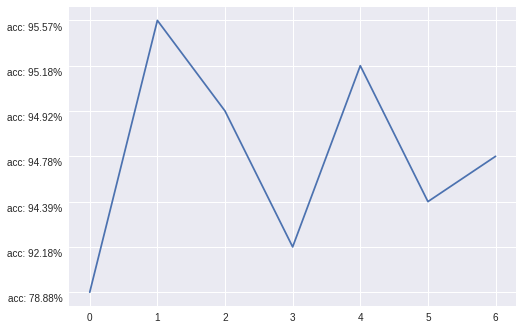

In [17]:
from numpy.random import seed 
from tensorflow import set_random_seed
from sklearn.preprocessing import *
for fun in funct:
  set_random_seed(2)
  seed(7) 
  scaler = StandardScaler()
  X = scaler.fit_transform(X)
  model = Sequential()
  model.add(Dense(1050, input_dim=8, kernel_initializer='RandomNormal', activation='relu' )) #bias_initializer='zeros'
  model.add(Dense(525, kernel_initializer='RandomNormal', activation='tanh'))
  model.add(Dense(125, kernel_initializer='RandomNormal', activation='relu'))
  model.add(Dense(1, kernel_initializer='RandomNormal', activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer=fun, metrics=['accuracy'])
  history = model.fit(X, Y, epochs=150, batch_size=97,validation_split=0.20 ) #shuffle = False, 
  scores = model.evaluate(X, Y)
  analysisdf.loc[rownumber,"optimizer"]=  fun
  analysisdf.loc[rownumber,"accuracy"]= ("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
  wks.set_dataframe(analysisdf,(1,1))
  rownumber  += 1
plt.plot(analysisdf["accuracy"])

To conclude we can we can use RMSprop or Adam as the optimizer for getting the highest accuracy